In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

sns.set_style("whitegrid")
plt.style.use('ggplot')
sns.set_palette("viridis")
os.makedirs('../visualizations', exist_ok=True)

In [25]:
def load_and_prepare_data(filepath):
    # Load the data with explicit date parsing
    df = pd.read_csv(
        filepath,
        parse_dates=['deadline', 'launched'],
        infer_datetime_format=True,
        on_bad_lines='warn'  
    )
    
    # Convert date columns to datetime if they're not already
    date_columns = ['deadline', 'launched']
    for col in date_columns:
        if col in df.columns:
            if not pd.api.types.is_datetime64_any_dtype(df[col]):
                df[col] = pd.to_datetime(df[col], errors='coerce')
    
    return df

# Load all datasets
try:
    df_2016 = load_and_prepare_data('../preprocessed_data/ks_projects_2016_12_clean.csv')
    df_2018 = load_and_prepare_data('../preprocessed_data/ks_projects_2018_01_clean.csv')
    df_live = load_and_prepare_data('../preprocessed_data/live_campaigns_clean.csv')
    df_most_backed = load_and_prepare_data('../preprocessed_data/most_backed_clean.csv')
    
    # Display basic info about the datasets
    print("2016 Dataset Info:")
    display(df_2016.info())
    print("\n2018 Dataset Info:")
    display(df_2018.info())
    
except Exception as e:
    print(f"Error loading data: {str(e)}")
    # Print the first few rows to help debug
    print("\nSample of 2016 data:")
    display(pd.read_csv('../preprocessed_data/ks_projects_2016_12_clean.csv', nrows=5))

/tmp/ipykernel_6577/457041229.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(
/tmp/ipykernel_6577/457041229.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(


Error loading data: Missing column provided to 'parse_dates': 'deadline, launched'

Sample of 2016 data:


/tmp/ipykernel_6577/457041229.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(


,id,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375


In [ ]:
def clean_numeric_columns(df):
    # List of columns that should be numeric
    numeric_columns = ['goal', 'pledged', 'usd_pledged', 'backers']
    
    for col in numeric_columns:
        if col in df.columns:
            # Remove any commas and convert to float
            if df[col].dtype == 'object':
                df[col] = df[col].astype(str).str.replace(',', '')
                df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

# Clean all dataframes
try:
    df_2016 = clean_numeric_columns(df_2016)
    df_2018 = clean_numeric_columns(df_2018)
    df_live = clean_numeric_columns(df_live)
    df_most_backed = clean_numeric_columns(df_most_backed)
    
    print("Data cleaning completed successfully!")
    
    # Display data types to verify
    print("\n2016 Data Types:")
    display(df_2016.dtypes)
    
except Exception as e:
    print(f"Error during data cleaning: {str(e)}")
    print("\nSample of problematic data:")
    display(df_2016.head())

Data cleaning completed successfully!

2016 Data Types:


id                        int64
name                     object
category                 object
main_category            object
currency                 object
deadline         datetime64[ns]
goal                    float64
launched         datetime64[ns]
pledged                 float64
state                    object
backers                 float64
country                  object
usd_pledged             float64
dtype: object

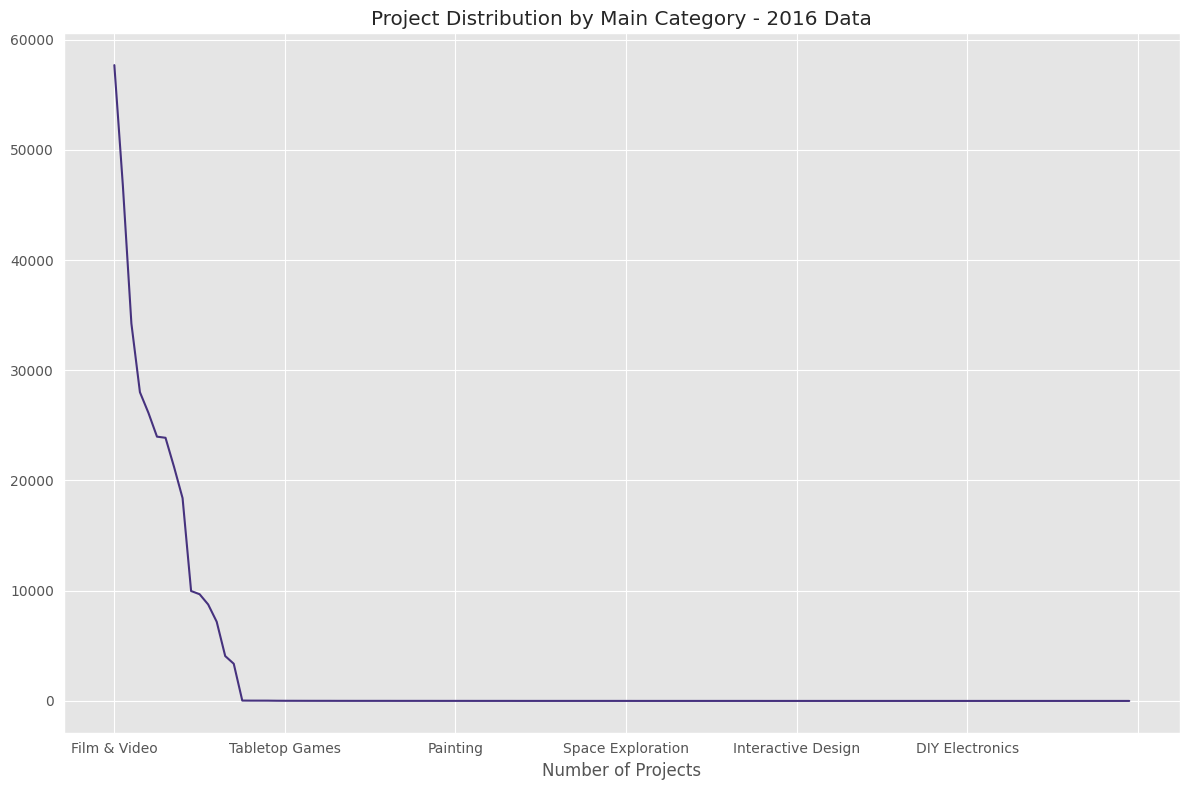

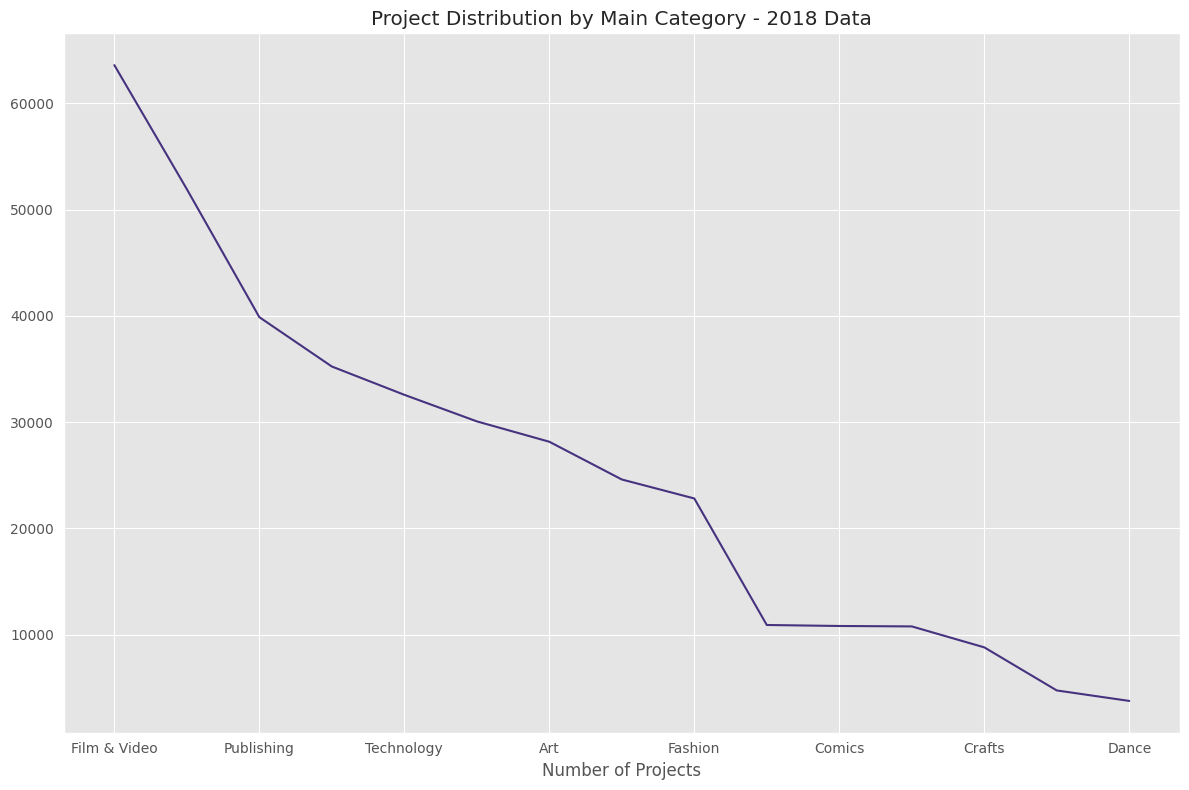

In [28]:
def plot_category_distribution(df, title, filename):
    try:
        plt.figure(figsize=(12, 8))
        df['main_category'].value_counts().plot()
        plt.title(f'Project Distribution by Main Category - {title}')
        plt.xlabel('Number of Projects')
        plt.tight_layout()
        os.makedirs('../visualizations', exist_ok=True)
        plt.savefig(f'../visualizations/{filename}.png', bbox_inches='tight')
        plt.show()
    except Exception as e:
        print(f"Error in plot_category_distribution: {str(e)}")
        print("\nAvailable columns:", df.columns.tolist())
        if 'main_category' in df.columns:
            print("\nSample of main_category values:", df['main_category'].head().tolist())

# Plot for 2016 data
plot_category_distribution(df_2016, '2016 Data', 'category_distribution_2016')

#plot for 2018 data
plot_category_distribution(df_2018, '2018 Data', 'category_distribution_2018')

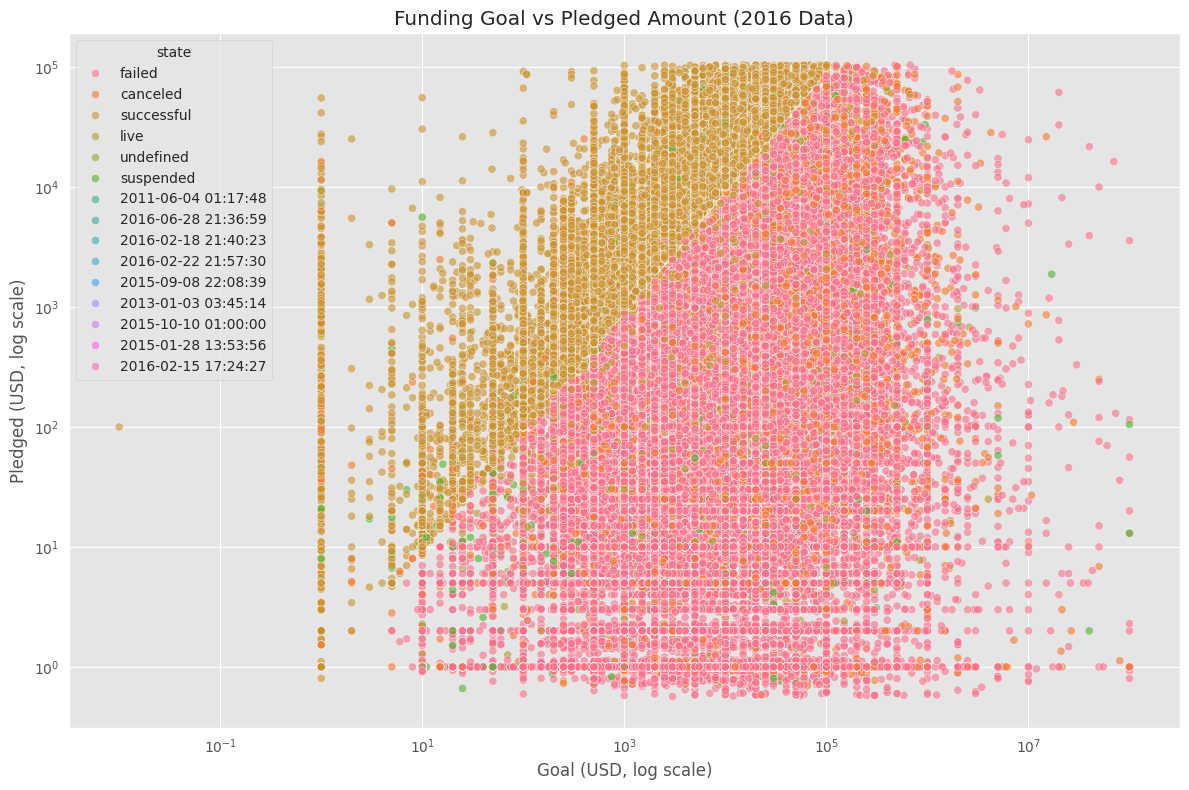

In [31]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='goal', y='usd_pledged', hue='state', 
               data=df_2016[df_2016['usd_pledged'] < df_2016['usd_pledged'].quantile(0.99)],
               alpha=0.6)
plt.xscale('log')
plt.yscale('log')
plt.title('Funding Goal vs Pledged Amount (2016 Data)')
plt.xlabel('Goal (USD, log scale)')
plt.ylabel('Pledged (USD, log scale)')
plt.tight_layout()
plt.savefig('../visualizations/goal_vs_pledged.png', bbox_inches='tight')
plt.show()

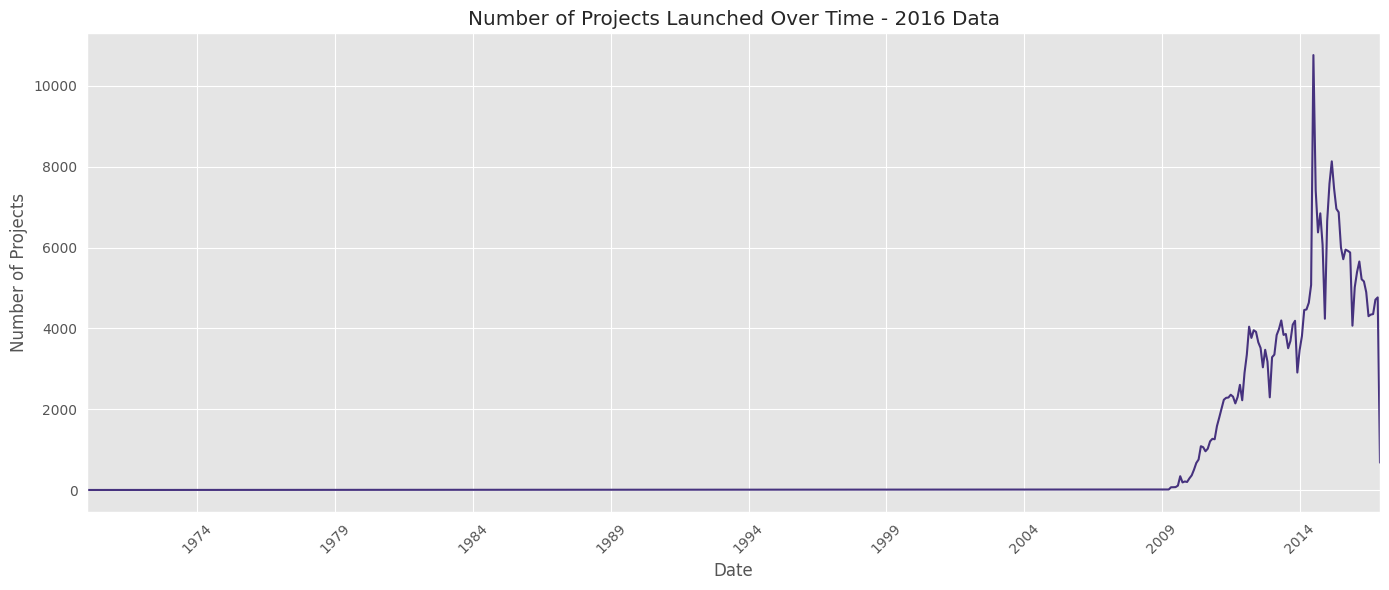

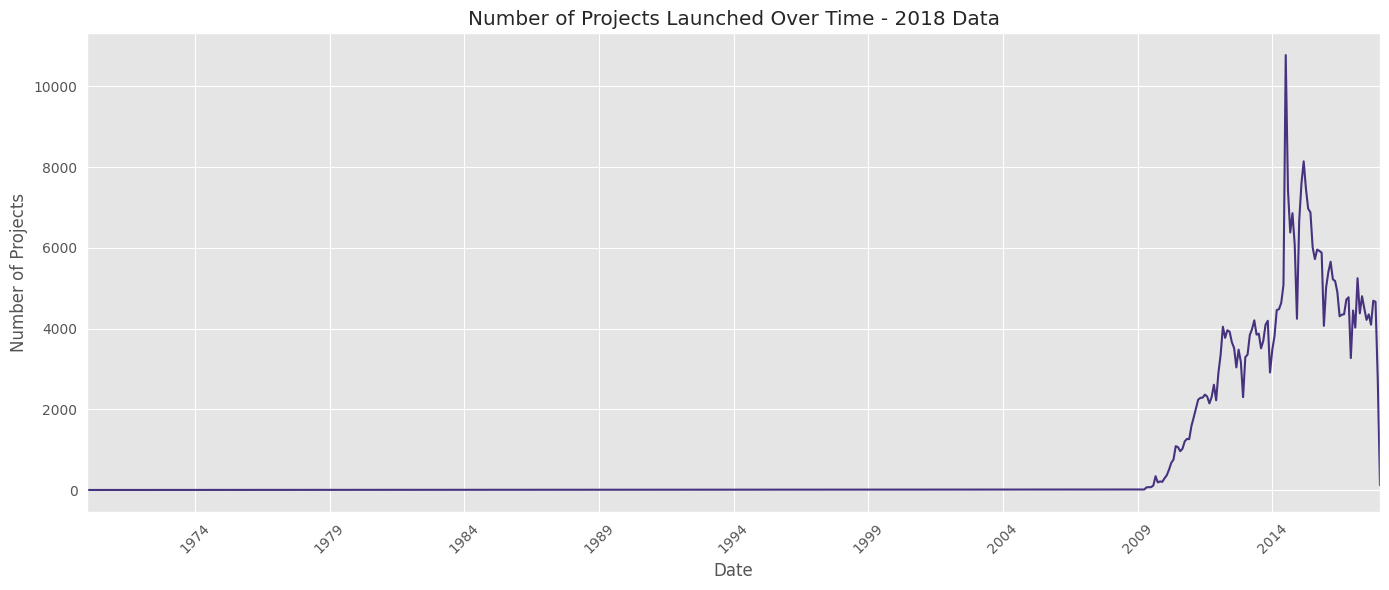

In [32]:
def plot_time_series(df, title, filename):
    # Extract month and year from launched date
    df['launched_month'] = df['launched'].dt.to_period('M')
    time_series = df.groupby('launched_month')['id'].count()
    
    plt.figure(figsize=(14, 6))
    time_series.plot()
    plt.title(f'Number of Projects Launched Over Time - {title}')
    plt.xlabel('Date')
    plt.ylabel('Number of Projects')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'../visualizations/{filename}.png', bbox_inches='tight')
    plt.show()

# Plot for 2016 data
plot_time_series(df_2016, '2016 Data', 'time_series_2016')

#plot for 2018 data
plot_time_series(df_2018, '2018 Data', 'time_series_2018')


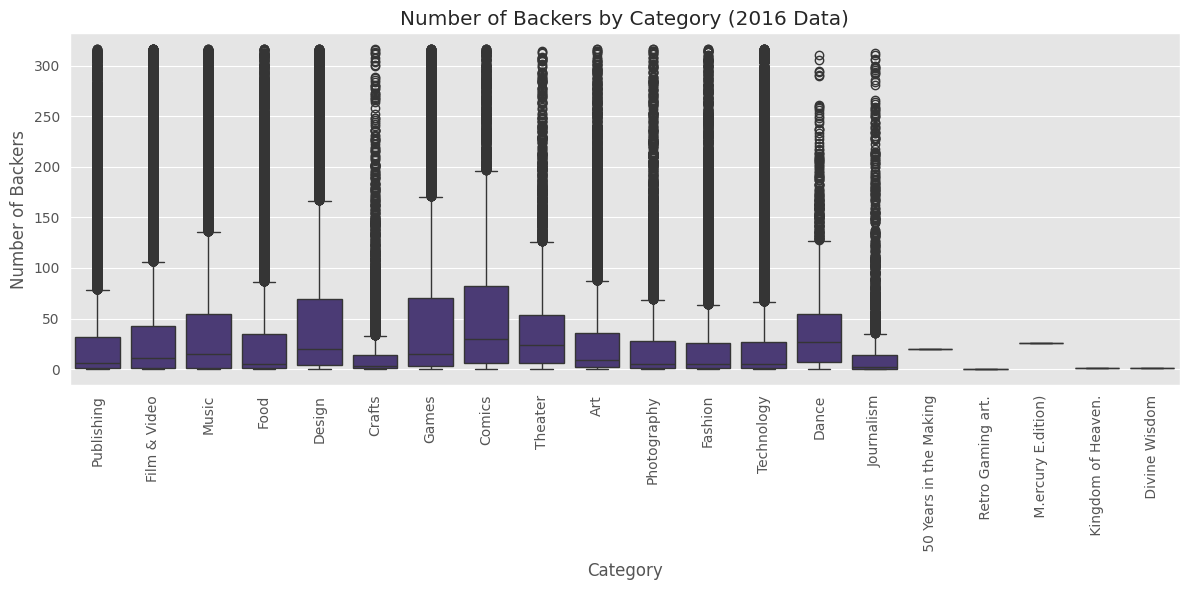

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='main_category', y='backers', 
           data=df_2016[df_2016['backers'] < df_2016['backers'].quantile(0.95)])
plt.xticks(rotation=90)
plt.title('Number of Backers by Category (2016 Data)')
plt.xlabel('Category')
plt.ylabel('Number of Backers')
plt.tight_layout()
plt.savefig('../visualizations/backers_by_category.png', bbox_inches='tight')
plt.show()

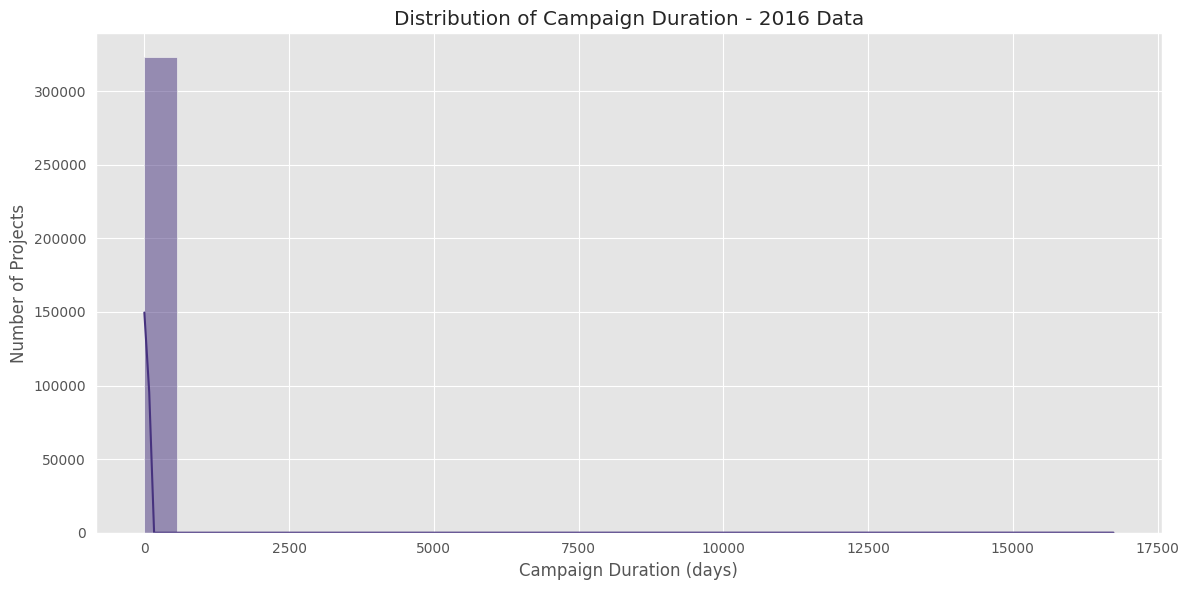

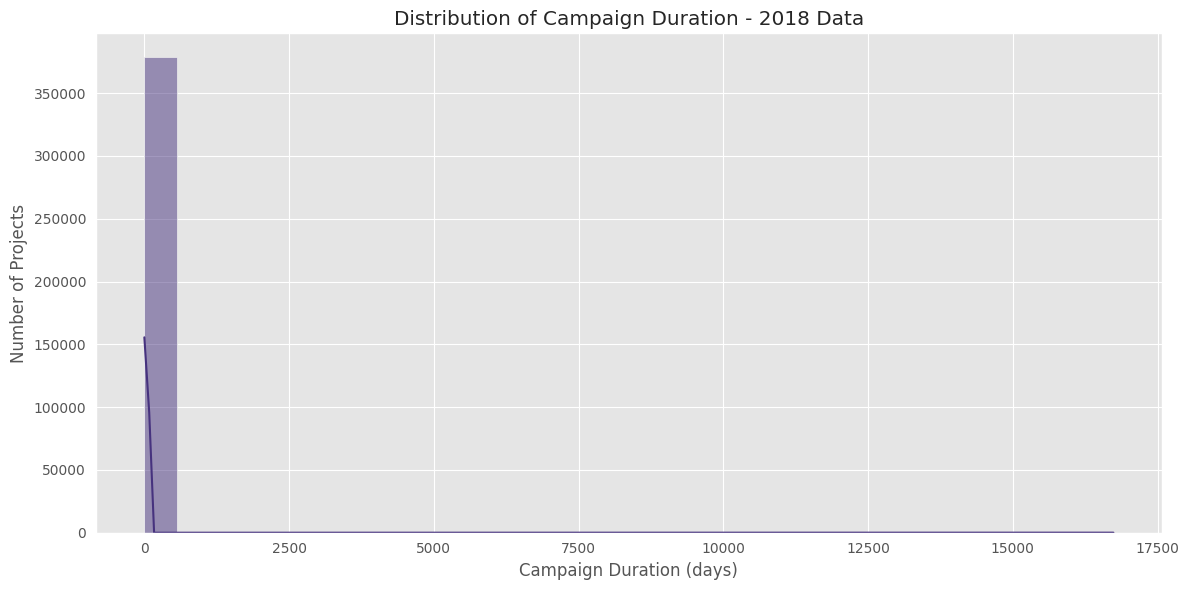

In [35]:
def plot_campaign_duration(df, title, filename):
    df['duration_days'] = (df['deadline'] - df['launched']).dt.days
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x='duration_days', bins=30, kde=True)
    plt.title(f'Distribution of Campaign Duration - {title}')
    plt.xlabel('Campaign Duration (days)')
    plt.ylabel('Number of Projects')
    plt.tight_layout()
    plt.savefig(f'../visualizations/{filename}.png', bbox_inches='tight')
    plt.show()

# Plot for 2016 data
plot_campaign_duration(df_2016, '2016 Data', 'campaign_duration_2016')

# plot for 2018 data
plot_campaign_duration(df_2018, '2018 Data', 'campaign_duration_2018')

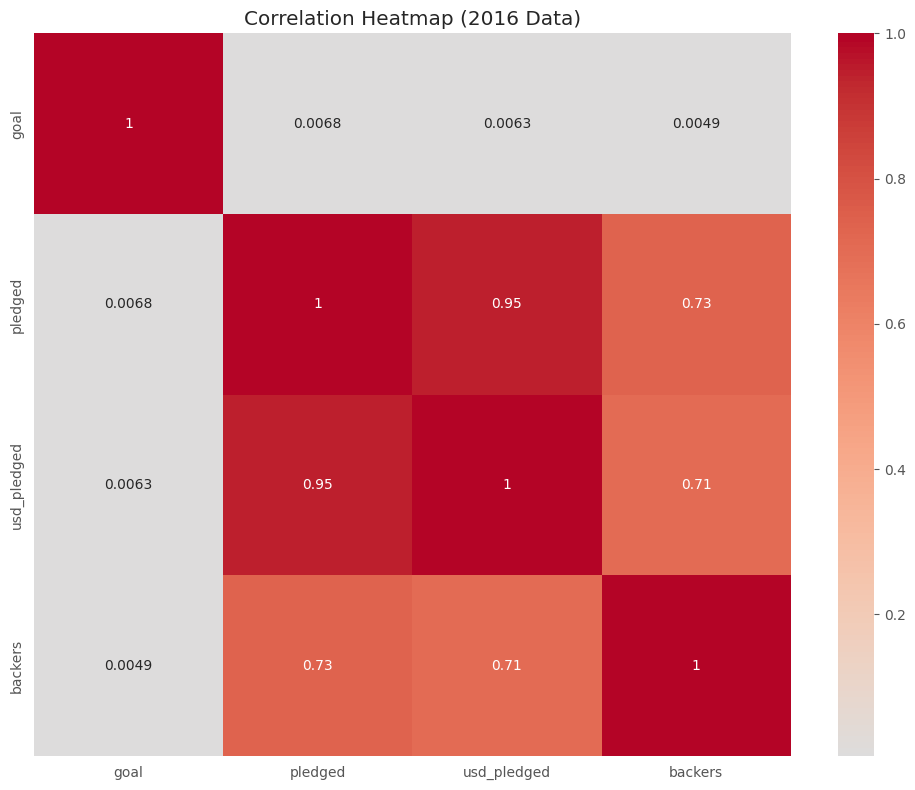

In [36]:
plt.figure(figsize=(10, 8))
correlation = df_2016[['goal', 'pledged', 'usd_pledged', 'backers']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap (2016 Data)')
plt.tight_layout()
plt.savefig('../visualizations/correlation_heatmap.png', bbox_inches='tight')
plt.show()

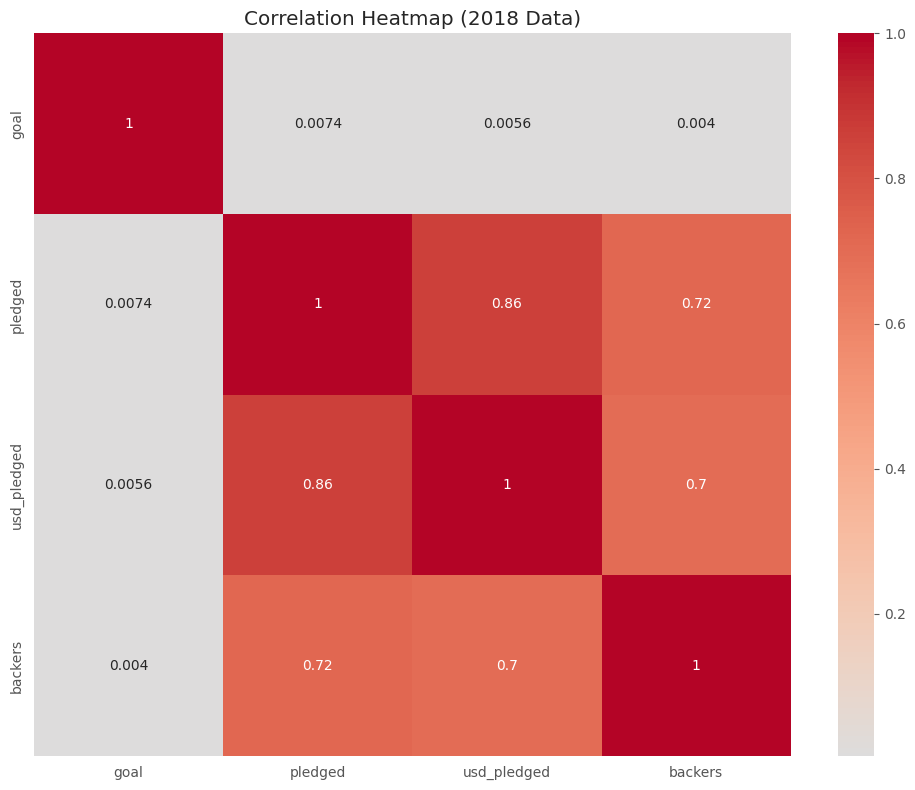

In [37]:
plt.figure(figsize=(10, 8))
correlation = df_2018[['goal', 'pledged', 'usd_pledged', 'backers']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap (2018 Data)')
plt.tight_layout()
plt.savefig('../visualizations/correlation_heatmap_2018.png', bbox_inches='tight')
plt.show()

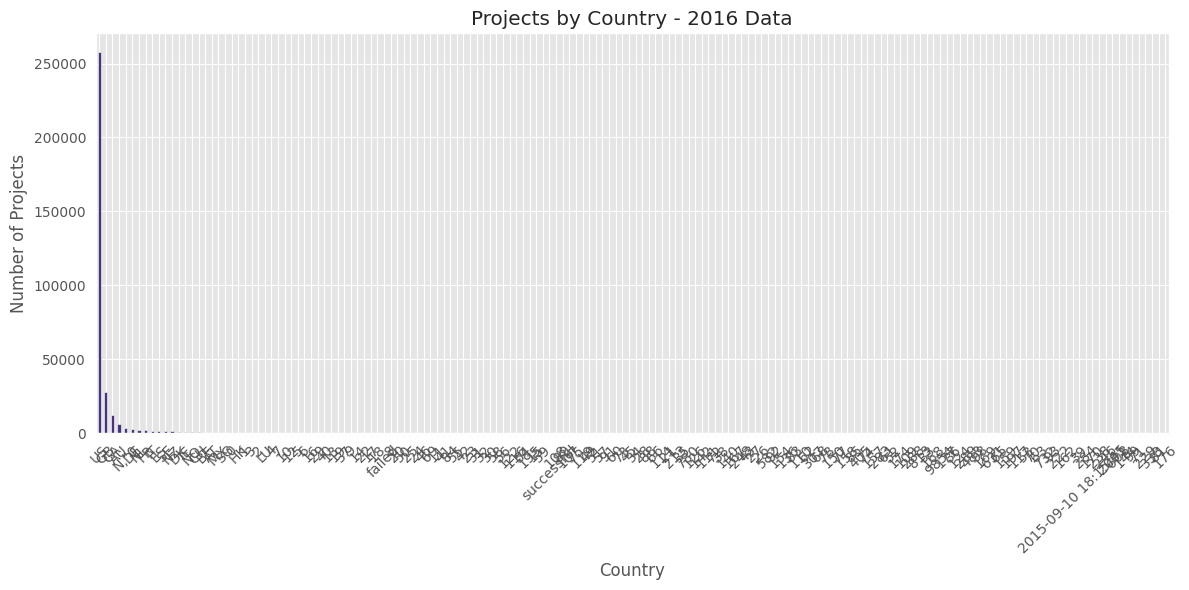

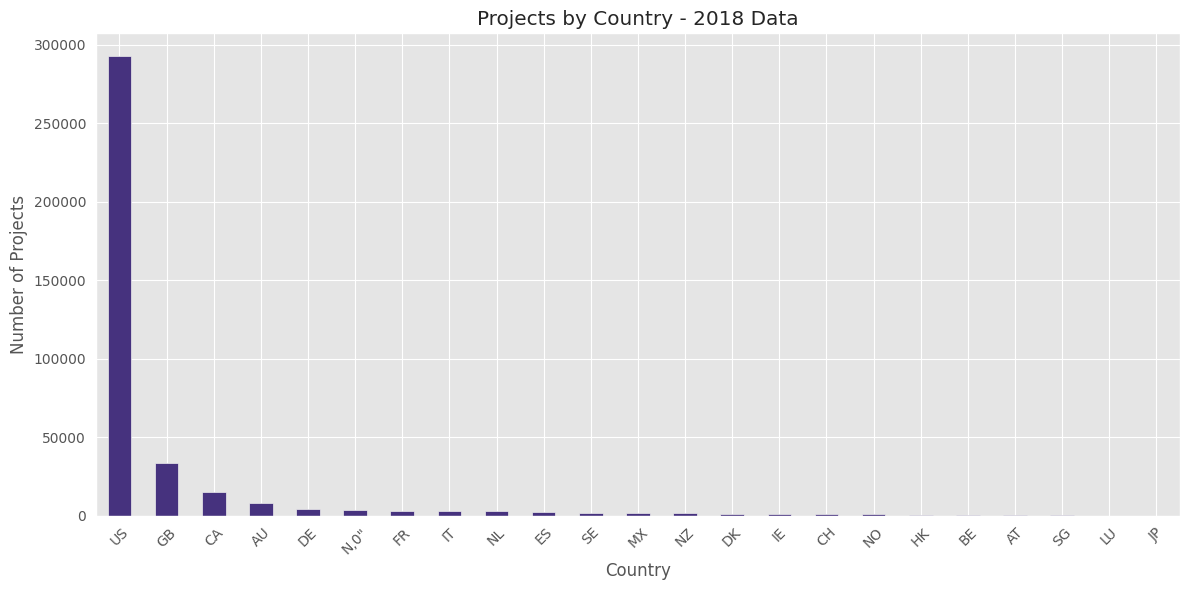

In [41]:
def plot_country_distribution(df, title, filename):
    plt.figure(figsize=(12, 6))
    df['country'].value_counts().plot(kind='bar')
    plt.title(f'Projects by Country - {title}')
    plt.xlabel('Country')
    plt.ylabel('Number of Projects')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'../visualizations/{filename}.png', bbox_inches='tight')
    plt.show()

# Plot for 2016 data
plot_country_distribution(df_2016, '2016 Data', 'country_distribution_2016')

# Plot for 2018 data
plot_country_distribution(df_2018, '2018 Data', 'country_distribution_2018')
